### Load Data

In [22]:
import numpy as np
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sampleSubmission.csv")

In [23]:
all_data_temp = pd.concat([train, test])
all_data_temp

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [24]:
all_data = pd.concat([train, test], ignore_index=True)
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


### Feature Engineering

In [25]:
from datetime import datetime

all_data['date'] = all_data['datetime'].apply(lambda x: x.split()[0]) # Create date feature
all_data['year'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[0]) # Create year feature
all_data['month'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[1]) # Create month feature
all_data['hour'] = all_data['datetime'].apply(lambda x: x.split()[1].split(':')[0]) # Create hour feature
all_data["weekday"] = all_data['date'].apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday()) # Create weekday feature

이 코드는 all_data라는 데이터프레임에 새로운 열(column)을 추가하는 것으로, 이 새 열의 이름은 weekday입니다. 이 열에 저장되는 값은 all_data 데이터프레임의 date 열에 있는 날짜 데이터를 기반으로 합니다.

all_data['date'].apply(lambda dateString : ...):

여기서 apply 함수는 date 열에 있는 모든 값을 (dateString으로 표현된) 하나씩 처리합니다.
lambda는 간단한 익명 함수(anonymous function)를 생성합니다. 이 함수는 각 날짜 문자열(dateString)을 받아서 처리합니다.
datetime.strptime(dateString,"%Y-%m-%d"):

datetime.strptime 함수는 문자열을 날짜 객체(datetime 객체)로 변환합니다.
여기서 "%Y-%m-%d"는 날짜의 형식을 나타내며, 연도(Year)-월(Month)-일(Day)을 의미합니다. 예를 들어, "2023-12-06"과 같은 형태입니다.
.weekday():

weekday() 함수는 datetime 객체에서 요일을 숫자로 반환합니다. 여기서 0은 월요일을, 6은 일요일을 나타냅니다.
결국 이 코드의 전체적인 작업은 all_data의 date 열에 있는 각 날짜를 연도-월-일 형식의 문자열에서 요일을 나타내는 숫자로 변환하여, 새로운 weekday 열에 저장하는 것입니다.

In [26]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
 12  date        17379 non-null  object 
 13  year        17379 non-null  object 
 14  month       17379 non-null  object 
 15  hour        17379 non-null  object 
 16  weekday     17379 non-null  int64  
dtypes: float64(6), int64(6), object(5)
memory usage: 2.3+ MB


In [27]:
# #Change categorical data type for memory reduction
# categorical_features = ['season', 'holiday', 'workingday', 'weather', 'weekday', 'month', 'year', 'hour']

# for feature in categorical_features:
#     all_data[feature] = all_data[feature].astype("category")

In [28]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
 12  date        17379 non-null  object 
 13  year        17379 non-null  object 
 14  month       17379 non-null  object 
 15  hour        17379 non-null  object 
 16  weekday     17379 non-null  int64  
dtypes: float64(6), int64(6), object(5)
memory usage: 2.3+ MB


In [29]:
# categorical_features = ['season', 'holiday', 'workingday', 'weather', 'weekday', 'month', 'year', 'hour']
#명목형 범주 : season, weather -> 원핫인코딩
#시간형 범주 : weekday, month, year, hour -> 원핫인코딩, weekday,month, hour은 삼각함수 사용해서 인코딩해보고 성능 비교.
#이진형 범주 : holiday, workingday -> 원핫인코딩
# for feature in categorical_features:
#     all_data[feature]=all_data[feature].astype('int')
#     print(all_data[feature].unique())

In [30]:
categorical_features = ['weather', 'weekday']
#명목형 범주 : season, weather -> 각 범주가 순서가 없고 독립적이라면, 원핫인코딩o 
#시간형 범주 : weekday, month, year, hour -> weekday, month는 삼각함수 사용해서 인코딩해보고 원핫인코딩과 성능 비교.
#이진형 범주 : holiday, workingday -> 원핫인코딩x 이미 0,1인 경우 원핫인코딩 필요없다.

In [31]:
# # 삼각 변환을 적용할 컬럼 (예: 'hour')
# all_data['hour_normalized'] = (all_data['hour'].astype(int) / 24) * 2 * np.pi
# all_data['hour_sin'] = np.sin(all_data['hour_normalized'])
# all_data['hour_cos'] = np.cos(all_data['hour_normalized'])

In [32]:
# all_data['month_normalized'] = (all_data['month'].astype(int) / 24) * 2 * np.pi
# all_data['month_sin'] = np.sin(all_data['month_normalized'])
# all_data['month_cos'] = np.cos(all_data['month_normalized'])

In [33]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder 인스턴스 생성 및 적용
encoder = OneHotEncoder(sparse=False)
all_data_encoded = encoder.fit_transform(all_data[categorical_features])

# 인코딩된 데이터를 DataFrame으로 변환
encoded_columns = encoder.get_feature_names_out(categorical_features)
all_data_encoded_df = pd.DataFrame(all_data_encoded, columns=encoded_columns)

# 원본 데이터셋과 인코딩된 데이터셋 병합
all_data = all_data.drop(categorical_features, axis=1)
all_data = pd.concat([all_data, all_data_encoded_df], axis=1)

c:\Users\user\anaconda3\envs\myenv\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [34]:
# from sklearn.preprocessing import OneHotEncoder

# # OneHotEncoder 인스턴스 생성 및 적용
# encoder = OneHotEncoder(sparse=False)
# all_data_encoded = encoder.fit_transform(all_data[categorical_features])

# # 인코딩된 데이터를 DataFrame으로 변환
# encoded_columns = encoder.get_feature_names_out(categorical_features)
# all_data_encoded_df = pd.DataFrame(all_data_encoded, columns=encoded_columns)

# # 원본 데이터셋과 인코딩된 데이터셋 병합
# all_data = all_data.drop(categorical_features, axis=1)
# all_data = pd.concat([all_data, all_data_encoded_df], axis=1)

In [35]:
#Separate train and test data. Assign train target value(y)
train = all_data[pd.notnull(all_data['count'])]
test = all_data[~pd.notnull(all_data['count'])]
y = train['count']

In [36]:
# 불필요한 특성 제거
drop_features = ['count', 'casual', 'registered', 'datetime', 'date', 'month']
X_train = train.drop(drop_features, axis=1)
X_test = test.drop(drop_features, axis=1)

In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10886 entries, 0 to 10885
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   temp        10886 non-null  float64
 4   atemp       10886 non-null  float64
 5   humidity    10886 non-null  int64  
 6   windspeed   10886 non-null  float64
 7   year        10886 non-null  object 
 8   hour        10886 non-null  object 
 9   weather_1   10886 non-null  float64
 10  weather_2   10886 non-null  float64
 11  weather_3   10886 non-null  float64
 12  weather_4   10886 non-null  float64
 13  weekday_0   10886 non-null  float64
 14  weekday_1   10886 non-null  float64
 15  weekday_2   10886 non-null  float64
 16  weekday_3   10886 non-null  float64
 17  weekday_4   10886 non-null  float64
 18  weekday_5   10886 non-null  float64
 19  weekday_6   10886 non-null  fl

### Train Model and Measure Model Performance

In [38]:
# 평가 점수(RMSLE) 함수 정의
def rmsle(y_true, y_pred, convertExp=True):
    # 지수 변환 함수 적용
    if convertExp:
        y_true = np.exp(y_true)  # 실제 값에 대해 지수 변환
        y_pred = np.exp(y_pred)  # 예측 값에 대해 지수 변환
        
    # 로그 변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.array([np.log(y+1) for y in y_true]))  # 실제 값에 로그 적용
    log_pred = np.nan_to_num(np.array([np.log(y+1) for y in y_pred]))  # 예측 값에 로그 적용
    
    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))  # 로그 차이의 제곱 평균에 루트 적용
    return output

- 이 함수는 Root Mean Squared Logarithmic Error (RMSLE)를 계산하는 함수입니다. RMSLE는 예측값과 실제값 사이의 로그 차이에 기반한 성능 지표로, 주로 회귀 모델에서 사용됩니다.
- convertExp 매개변수는 입력된 실제값(y_true)과 예측값(y_pred)에 지수 변환을 적용할지 여부를 결정합니다.
np.exp()는 넘파이의 지수 함수로, 값을 자연상수 e의 지수로 변환합니다.
np.log()는 로그 함수로, y+1에 대해 자연 로그를 취합니다 (+1은 0 값을 피하기 위함입니다).
np.nan_to_num()는 NaN 값을 0으로 변환합니다.
마지막으로, 실제값과 예측값의 로그 차이의 제곱에 대한 평균의 제곱근을 구하여 RMSLE 값을 반환합니다.

#### Linear regression mode

In [39]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [41]:
from sklearn.linear_model import LinearRegression

# Step 1: Create Model
linear_reg_model = LinearRegression()

# Step 2: Train Model
log_y = np.log1p(y)  # Log Transformation of Target Value y np.log1p 함수는 입력값에 1을 더한 뒤 자연로그를 취하는 연산을 수행합니다. 이는 0 또는 음수 값에 대한 로그 변환 시 문제를 방지하기 위해 사용됩니다.
linear_reg_model.fit(X_train, log_y) 

# Step 3 : Predict
preds = linear_reg_model.predict(X_train)

# Step 4 : Evaluate
print ('Linear Regression RMSLE:', rmsle(log_y, preds, True))

Linear Regression RMSLE: 0.974028010629693


In [42]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Step 1: Create Model
ridge_model = Ridge()

# Step 2-1 : Create GridSearchCV Object
# Hyper-parameter List
ridge_params = {'max_iter':[3000], 'alpha':[0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}
# Evaluate Function for Cross-Validation (RMSLE score)
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False) 
# Create GridSearchCV Object (with Ridge)
gridsearch_ridge_model = GridSearchCV(estimator=ridge_model,
                                      param_grid=ridge_params,
                                      scoring=rmsle_scorer,
                                      cv=5)

# Step 2-2 : Perform Grid Search
log_y = np.log1p(y) # Log Transformation of Target Value y
gridsearch_ridge_model.fit(X_train, log_y) # Train (Grid Search)

print('Best Parameter:', gridsearch_ridge_model.best_params_)

# Step 3 : Predict
preds = gridsearch_ridge_model.best_estimator_.predict(X_train)

# Step 4 : Evaluate
print('Ridge Regression RMSLE:', rmsle(log_y, preds, True))

Best Parameter: {'alpha': 0.1, 'max_iter': 3000}
Ridge Regression RMSLE: 0.9740280952043623


In [43]:
from sklearn.linear_model import Lasso

# Step 1: Create Model
lasso_model = Lasso()

# Step 2-1 : Create GridSearchCV Object
# Hyper-parameter List
lasso_alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params = {'max_iter':[3000], 'alpha':lasso_alpha}
# Create GridSearchCV Object (with Lasso)
gridsearch_lasso_model = GridSearchCV(estimator=lasso_model,
                                      param_grid=lasso_params,
                                      scoring=rmsle_scorer,
                                      cv=5)


# Step 2-2 : Perform Grid Search
log_y = np.log1p(y)
gridsearch_lasso_model.fit(X_train, log_y) # Train (Grid Search)

print('Best Parameter:', gridsearch_lasso_model.best_params_)

# Step 3 : Predict
preds = gridsearch_lasso_model.best_estimator_.predict(X_train)

# Step 4 : Evaluate
print('Lasso Regression RMSLE:', rmsle(log_y, preds, True))

Best Parameter: {'alpha': 0.001, 'max_iter': 3000}
Lasso Regression RMSLE: 0.9740743979361189


In [44]:
from sklearn.ensemble import RandomForestRegressor

# Step 1: Create Model
randomforest_model = RandomForestRegressor()

# Step 2-1 : Create GridSearchCV Object
# Hyper-parameter List
rf_params = {'random_state':[42], 'n_estimators':[100, 120, 140]}
# Create GridSearchCV Object (with Random Forest Regression)
gridsearch_random_forest_model = GridSearchCV(estimator=randomforest_model,
                                              param_grid=rf_params,
                                              scoring=rmsle_scorer,
                                              cv=5)

# Step 2-2 : Perform Grid Search
log_y = np.log1p(y)
gridsearch_random_forest_model.fit(X_train, log_y)

print('Best Parameter:', gridsearch_random_forest_model.best_params_)

# 스텝 3 : 예측
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)

# 스텝 4 : 평가
print('Random Forest Regression RMSLE:', rmsle(log_y, preds, True))

c:\Users\user\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

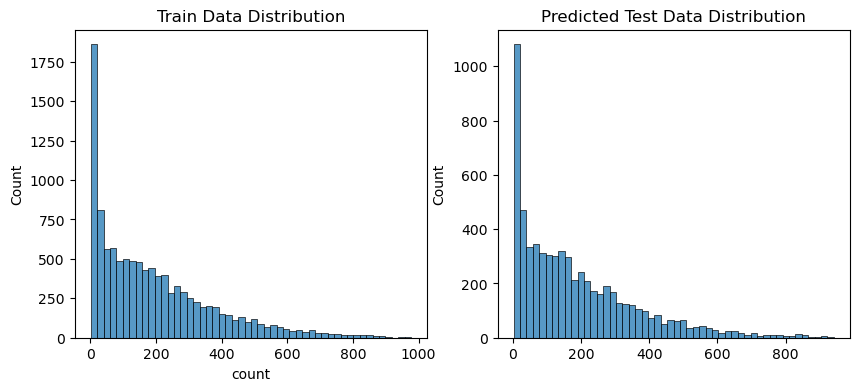

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

randomforest_preds = gridsearch_random_forest_model.best_estimator_.predict(X_test)

figure, axes = plt.subplots(ncols=2)
figure.set_size_inches(10, 4)

sns.histplot(y, ax=axes[0], bins=50)
axes[0].set_title('Train Data Distribution')
sns.histplot(np.exp(randomforest_preds), ax=axes[1], bins=50) #randomforest_preds가 로그 스케일로 변환된 값이라면, np.exp를 사용하여 원래 스케일로 되돌리는 것이 필요합니다. 이는 특히 회귀 문제에서 타겟 변수에 로그 변환을 적용했을 때 일반적입니다.
axes[1].set_title('Predicted Test Data Distribution');

In [ ]:
submission['count'] = np.exp(randomforest_preds)
submission.to_csv('submission.csv', index=False)